# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Đinh Nguyễn Gia Bảo
- MSSV: 22127027
- Lớp: 22CLC03

## Import các thư viện liên quan

In [563]:
import numpy as np #For calculate matrix
from PIL import Image #pip install Pillow, use for read and write image
import matplotlib.pyplot as plt #For display image

## Helper functions

In [564]:
def read_img(img_path):
    #Read image from img_path
    img = Image.open(img_path)
    #Convert image to 2D array
    img_2d = np.array(img)

    return img_2d

def show_img(img_2d):
    #Display image
    plt.imshow(img_2d)

    #Turn off axis -> not display axis -> make image look better
    plt.axis('off')

    #Display image
    plt.show()

def save_img(img_2d, img_path):
    #Convert 2D array to image by using Image.fromarray
    img = Image.fromarray(img_2d.astype('uint8'))

    #Save image in png and pdf format
    img.save(img_path + '.png')
    img.save(img_path + '.pdf')

def convert_img_to_1d(img_2d):
    #Get height, width and channels of the image
    height, width, channels = img_2d.shape

    #Reshape 2D array to 1D array
    img_1d = img_2d.reshape((height * width, channels))

    return img_1d

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    # Create Centroids
    if init_centroids == 'random':
        centroids_size = (k_clusters, img_1d.shape[1])
        centroids = np.random.randint(0, 256, centroids_size)

    elif init_centroids == 'in_pixels':
        index = np.random.choice(img_1d.shape[0], k_clusters, replace=False)
        centroids = img_1d[index]

    else:
        raise ValueError("Invalid initialization type. Use 'random' or 'in_pixels'.")

    for i in range(max_iter): 
        # Assign each pixel to the nearest centroid
        labels = label_pixels(img_1d, centroids)

        # Store old centroids to check for convergence -> happens because of the random initialization
        old_centroids = centroids.copy()
        
        # Recompute centroids based on current clusters
        centroids = update_centroids(img_1d, labels, centroids.shape)

        # Check for convergence -> if centroids do not change much, stop
        if np.allclose(old_centroids, centroids, rtol=1e-3, equal_nan=False):
            break

    return centroids, labels

def generate_2d_img(img_2d_shape, centroids, labels):
    
    # With every pixel, replace that pixel with its centroid
    new_img = centroids[labels].astype(np.uint8)

    # Reshape to the original shape
    new_img = new_img.reshape(img_2d_shape)
    
    return new_img

#Additional functions
def label_pixels(img_1d, centroids):
    
    # Reshape centroids to enable broadcasting
    reshaped_centroids = centroids[:, None]  # Shape: (k_clusters, 1, num_channels)
    
    # Calculate differences between each pixel and each centroid
    differences = img_1d - reshaped_centroids  # Shape: (k_clusters, height * width, num_channels)
    
    # Calculate Euclidean distances (norms) along axis 2
    distances = np.linalg.norm(differences, axis=2)  # Shape: (k_clusters, height * width)
    
    # Find index of the centroid with minimum distance for each pixel
    labels = np.argmin(distances, axis=0)  # Shape: (height * width,)
    
    return labels

def update_centroids(img, labels, old_centroids_shape):
    # Initialize new centroids based on the shape of the old centroids
    centroids = np.zeros(old_centroids_shape)
    
    # Iterate over all clusters
    for i in range(old_centroids_shape[0]):
        # Get all pixels in the current cluster
        pixels = img[labels == i]
        
        # Calculate the mean of all pixels in the cluster
        if pixels.shape[0] > 0:
            centroids[i] = np.mean(pixels, axis=0)
    
    return centroids

## Your tests

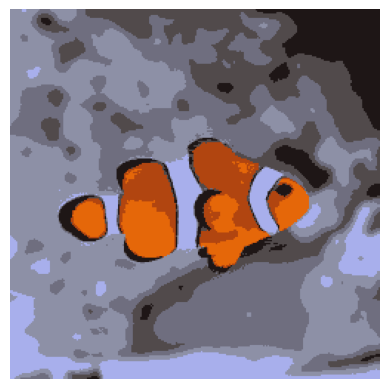

In [569]:
# YOUR CODE HERE
img_path = 'clownfish.jpg'
img_2d = read_img(img_path)

img_1d = convert_img_to_1d(img_2d)

# Init number of clusters
k_clusters = 7

# Init maximum iterator for stop criterion of K-means function
max_iter = 100

# Run K-means
init_centroids = 'in_pixels'
centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)

result = generate_2d_img(img_2d.shape, centroids, labels)

show_img(result)
save_img(result, 'result')


## Main FUNCTION

In [566]:
# YOUR CODE HERE
def main():
    #Input order
    #1. Image path, 2. k_clusters (3/5/7), 3. Iteration_max, 4. Init_types (random/in_pixels)
    img_path = str(input())  # Replace with your image path
    k_clusters = int(input())  # Replace with your number of clusters
    max_iter = int(input())  # Replace with your maximum number of iterations
    init_centroids = str(input())  # Replace with your initialization type
    
    # Read the image
    img_2d = read_img(img_path)
    
    # Show the original image
    show_img(img_2d)
    
    # Convert the image to 1D
    img_1d = convert_img_to_1d(img_2d)
    
    # Perform K-means clustering
    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_centroids)
    
    # Generate the clustered image
    new_img_2d = generate_2d_img(img_2d.shape, centroids, labels)
    
    # Show the clustered image
    show_img(new_img_2d)
    
    # Save the clustered image
    save_img(new_img_2d, 'Result')  # Replace with your save path

In [567]:
# Call main function
main()